In [50]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

In [51]:
from sklearn.model_selection import train_test_split
mylist= os.listdir('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data')
type(mylist)

list

In [14]:
print(mylist[10])

03-01-01-01-01-01-11.wav


In [20]:
print(mylist[2800][:2])

su


In [52]:
len(mylist)

2932

In [5]:
data, sampling_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\03-02-02-01-01-01-01.wav')
sampling_rate

22050

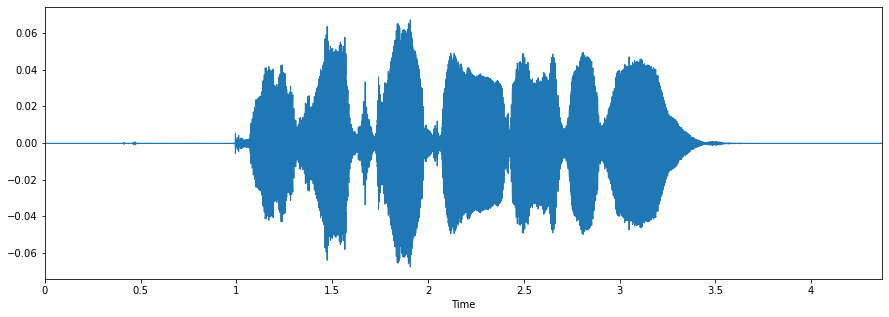

In [53]:
import os
import pandas as pd
import librosa
import glob

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

<ipython-input-1-038f054dadcd>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\03-02-02-01-01-01-01.wav')
<ipython-input-1-038f054dadcd>:19: RuntimeWarning: divide by zero encountered in log
  X[i,:] = np.log(np.abs(z[:nfft//2]))


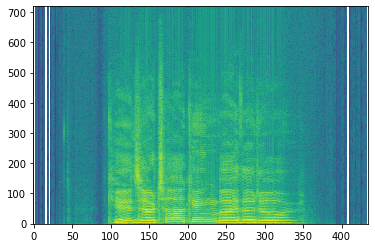

In [1]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

sr,x = scipy.io.wavfile.read('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\03-02-02-01-01-01-01.wav')

nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

nn = range(nwin, len(x), nstep)
X = np.zeros( (len(nn), nfft//2))
for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [59]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='03':
        feeling_list.append('happy')
    elif item[6:-16]=='04':
        feeling_list.append('sad')
    elif item[6:-16]=='05':
        feeling_list.append('angry')
    elif item[6:-16]=='06':
        feeling_list.append('fearful')
    elif item[6:-16]=='07':
        feeling_list.append('disgust')
    elif item[6:-16]=='08':
        feeling_list.append('surprised')
    elif item[6:-16]=='01':
        feeling_list.append('neutral')
    elif item[:1]=='a':
        feeling_list.append('angry')
    elif item[:1]=='f':
        feeling_list.append('fearful')
    elif item[:1]=='h':
        feeling_list.append('happy')
    elif item[:1]=='n':
        feeling_list.append('neutral')
    elif item[:1]=='d':
        feeling_list.append('disgust')
    elif item[:2]=='su':
        feeling_list.append('surprised')
    elif item[:2]=='sa':
        feeling_list.append('sad')

In [60]:
labels = pd.DataFrame(feeling_list)
labels = labels.rename(columns={0: 'label'})
labels

,label
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
2551,surprised
2552,surprised
2553,surprised
2554,surprised


In [61]:
import seaborn as sns
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

sad          436
happy        436
fearful      436
angry        436
neutral      308
disgust      252
surprised    252
Name: label, dtype: int64


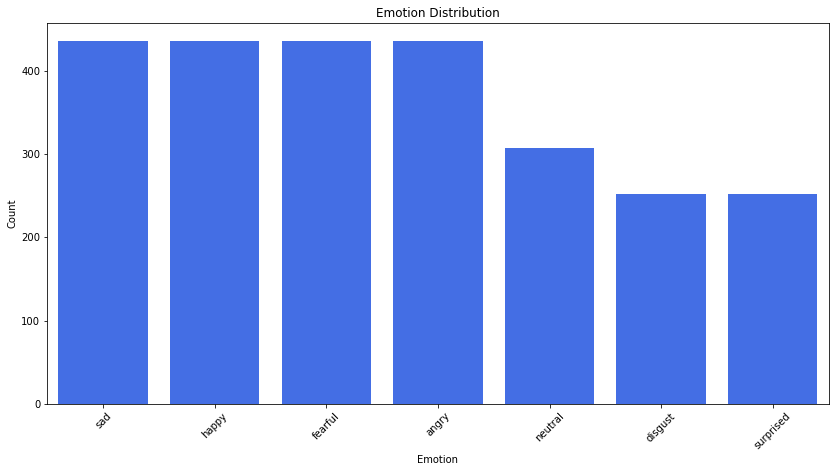

In [63]:
plot = labels.label.value_counts()
print(plot)
plot_emotion_dist(plot, "#2962FF", "Emotion Distribution")

In [68]:
df = pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\n04.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=12).T
type(mfccs)

list

In [77]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=12).T
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1

In [80]:
df

,feature
0,"[[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,"[[-821.7846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,"[[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,"[[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
4,"[[-864.3776, 8.127356, 7.884954, 7.6639547, 7...."
...,...
2927,"[[-485.53946, 91.45825, -100.50662, 62.767082,..."
2928,"[[-558.5976, 122.28981, 12.507676, 48.04165, 5..."
2929,"[[-584.8166, 141.48561, 57.884136, 27.692694, ..."
2930,"[[-496.2694, 140.04422, -25.320393, 22.740692,..."


In [177]:
lis = np.array([np.array([np.array([1,2,3]),np.array([3,6,7])]),np.array([np.array([66,99,88]),np.array([15,14,17])])])
lis

array([[[ 1,  2,  3],
        [ 3,  6,  7]],

       [[66, 99, 88],
        [15, 14, 17]]])

In [104]:
newdf = pd.concat([df3,labels], axis=1)
newdf

,0,label
0,"[[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",neutral
1,"[[-821.7846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",neutral
2,"[[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",neutral
3,"[[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",neutral
4,"[[-864.3776, 8.127356, 7.884954, 7.6639547, 7....",neutral
...,...,...
2927,"[[-485.53946, 91.45825, -100.50662, 62.767082,...",NaN
2928,"[[-558.5976, 122.28981, 12.507676, 48.04165, 5...",NaN
2929,"[[-584.8166, 141.48561, 57.884136, 27.692694, ...",NaN
2930,"[[-496.2694, 140.04422, -25.320393, 22.740692,...",NaN


In [178]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,label
1165,"[[-701.80646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",surprised
2389,"[[-717.66266, 3.4597201, 1.4607784, 1.3862273,...",neutral
2727,"[[-563.7995, 77.45607, 42.74196, 24.456326, 28...",NaN
234,"[[-878.4892, 25.44675, 23.905731, 23.167658, 2...",happy
1311,"[[-745.9058, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",neutral
1421,"[[-674.44867, 38.394226, -33.236847, -12.84891...",happy
527,"[[-904.378, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",angry
1468,"[[-700.64624, 32.117928, -48.563137, 29.609734...",happy
1530,"[[-777.23254, 2.253315, 2.1839662, 1.9440954, ...",sad
2892,"[[-474.07727, 38.957623, 19.337727, 7.7153406,...",NaN


In [61]:
rnewdf=rnewdf.fillna(0)

In [179]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]
# train1, test1 = train_test_split(rnewdf, test_size=0.2, random_state=42, shuffle=True)

In [180]:
train[250:260]

,0,label
2442,"[[-762.4806, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",sad
1210,"[[-822.2812, 9.055281, 9.008118, 8.929953, 8.8...",surprised
843,"[[-645.1464, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",fearful
2795,"[[-579.87634, 212.09363, 20.581944, 35.29917, ...",NaN
1893,"[[-613.2583, 22.881605, -4.1744704, -1.4353323...",fearful
1270,"[[-744.12683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",neutral
1758,"[[-684.59906, 22.237583, -9.51324, -18.502163,...",angry
1708,"[[-669.4011, 40.895866, -41.56624, 1.9179518, ...",angry
232,"[[-851.09845, 15.480904, 15.087006, 14.538582,...",happy
1520,"[[-771.8331, 5.688327, 5.6484256, 5.58255, 5.4...",happy


In [181]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]



In [182]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

c:\users\kalelt'has\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [66]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
x_traincnn.shape

(1685, 216, 1)

In [68]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_14 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_15 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 27, 128)          

In [70]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700
106/106 [==============================] - 9s 83ms/step - loss: 2.3623 - accuracy: 0.1139 - val_loss: 2.2646 - val_accuracy: 0.1701
Epoch 2/700
106/106 [==============================] - 8s 79ms/step - loss: 2.2818 - accuracy: 0.1353 - val_loss: 2.2348 - val_accuracy: 0.1862
Epoch 3/700
106/106 [==============================] - 8s 80ms/step - loss: 2.2454 - accuracy: 0.1608 - val_loss: 2.2186 - val_accuracy: 0.2069
Epoch 4/700
106/106 [==============================] - 9s 80ms/step - loss: 2.2157 - accuracy: 0.1703 - val_loss: 2.1709 - val_accuracy: 0.2299
Epoch 5/700
106/106 [==============================] - 8s 80ms/step - loss: 2.1746 - accuracy: 0.1929 - val_loss: 2.1457 - val_accuracy: 0.1908
Epoch 6/700
106/106 [==============================] - 8s 79ms/step - loss: 2.1315 - accuracy: 0.2101 - val_loss: 2.1030 - val_accuracy: 0.2092
Epoch 7/700
106/106 [==============================] - 8s 80ms/step - loss: 2.1044 - accuracy: 0.2178 - val_loss: 2.0473 - val_accuracy:

106/106 [==============================] - 8s 76ms/step - loss: 1.0141 - accuracy: 0.6042 - val_loss: 1.4639 - val_accuracy: 0.4253
Epoch 160/700
106/106 [==============================] - 8s 78ms/step - loss: 1.0105 - accuracy: 0.6030 - val_loss: 1.5133 - val_accuracy: 0.4138
Epoch 161/700
106/106 [==============================] - 8s 78ms/step - loss: 0.9862 - accuracy: 0.6184 - val_loss: 1.4487 - val_accuracy: 0.4299
Epoch 170/700
106/106 [==============================] - 8s 78ms/step - loss: 0.9757 - accuracy: 0.6237 - val_loss: 1.4766 - val_accuracy: 0.4299
Epoch 171/700
106/106 [==============================] - 9s 80ms/step - loss: 0.9949 - accuracy: 0.6166 - val_loss: 1.3985 - val_accuracy: 0.4529
Epoch 172/700
106/106 [==============================] - 8s 78ms/step - loss: 0.9700 - accuracy: 0.6190 - val_loss: 1.3823 - val_accuracy: 0.4460
Epoch 173/700
106/106 [==============================] - 8s 79ms/step - loss: 0.9704 - accuracy: 0.6243 - val_loss: 1.3988 - val_accuracy:

106/106 [==============================] - 9s 86ms/step - loss: 0.4928 - accuracy: 0.8409 - val_loss: 1.6601 - val_accuracy: 0.4713
Epoch 365/700
106/106 [==============================] - 9s 84ms/step - loss: 0.4813 - accuracy: 0.8350 - val_loss: 1.7739 - val_accuracy: 0.4414
Epoch 366/700
106/106 [==============================] - 9s 84ms/step - loss: 0.4929 - accuracy: 0.8202 - val_loss: 1.7166 - val_accuracy: 0.4621
Epoch 367/700
106/106 [==============================] - 9s 84ms/step - loss: 0.4663 - accuracy: 0.8326 - val_loss: 1.7372 - val_accuracy: 0.4644
Epoch 368/700
106/106 [==============================] - 9s 83ms/step - loss: 0.4928 - accuracy: 0.8178 - val_loss: 1.6718 - val_accuracy: 0.4621
Epoch 369/700
106/106 [==============================] - 9s 84ms/step - loss: 0.4862 - accuracy: 0.8273 - val_loss: 1.6427 - val_accuracy: 0.4690
Epoch 370/700
106/106 [==============================] - 9s 83ms/step - loss: 0.4750 - accuracy: 0.8338 - val_loss: 1.6424 - val_accuracy:

106/106 [==============================] - 8s 79ms/step - loss: 0.1249 - accuracy: 0.9644 - val_loss: 2.5845 - val_accuracy: 0.4667
Epoch 611/700
106/106 [==============================] - 8s 73ms/step - loss: 0.1342 - accuracy: 0.9638 - val_loss: 2.5256 - val_accuracy: 0.4598
Epoch 612/700
106/106 [==============================] - 8s 78ms/step - loss: 0.1242 - accuracy: 0.9585 - val_loss: 2.6255 - val_accuracy: 0.4460
Epoch 613/700
106/106 [==============================] - 9s 86ms/step - loss: 0.1324 - accuracy: 0.9650 - val_loss: 2.5281 - val_accuracy: 0.4736
Epoch 614/700
106/106 [==============================] - 8s 77ms/step - loss: 0.1346 - accuracy: 0.9602 - val_loss: 2.4598 - val_accuracy: 0.4736
Epoch 615/700
106/106 [==============================] - 8s 78ms/step - loss: 0.1249 - accuracy: 0.9626 - val_loss: 2.5190 - val_accuracy: 0.4782
Epoch 616/700
106/106 [==============================] - 9s 83ms/step - loss: 0.1229 - accuracy: 0.9614 - val_loss: 2.6522 - val_accuracy:

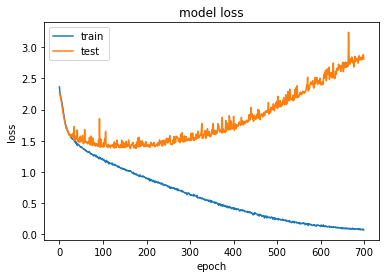

In [72]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\uber\Desktop\faurecia\Mood_recognition\saved_models\Emotion_Voice_Detection_Model.h5 


In [33]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [37]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model1.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Loaded model from disk


ValueError: in user code:

    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1176 test_step
        self.compiled_loss(
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\users\uber\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 16) and (None, 10) are incompatible
